In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Path to the images of the dataset
train_path = './images/cats_vs_dogs/train'
validation_path = './images/cats_vs_dogs/validation'
test_path = './images/cats_vs_dogs/test'

In [6]:
# Create the data generator for the input data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print('Loading training data:')
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=40,
    class_mode='binary'
)

print('\nLoading validation data:')
validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    validation_path,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

print('\nLoading test data:')
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Loading trainning data:
Found 15994 images belonging to 2 classes.

Loading validation data:
Found 2000 images belonging to 2 classes.

Loading test data:
Found 2000 images belonging to 2 classes.


In [7]:
# Import classes for the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [9]:
# Build the model
model = Sequential()

# Stack the layers
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Setup the optimizer
opt = Adam(learning_rate=0.001)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 64)       

In [10]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=120,
                   validation_data=validation_generator, validation_steps=64)

Epoch 1/120
100/100 [==============================] - 173s 2s/step - loss: 0.6921 - accuracy: 0.5260 - val_loss: 0.6793 - val_accuracy: 0.6000
Epoch 2/120
100/100 [==============================] - 102s 1s/step - loss: 0.6556 - accuracy: 0.6196 - val_loss: 0.6761 - val_accuracy: 0.5922
Epoch 3/120
100/100 [==============================] - 77s 764ms/step - loss: 0.6410 - accuracy: 0.6248 - val_loss: 0.6193 - val_accuracy: 0.6672
Epoch 4/120
100/100 [==============================] - 70s 702ms/step - loss: 0.6221 - accuracy: 0.6420 - val_loss: 0.6116 - val_accuracy: 0.6680
Epoch 5/120
100/100 [==============================] - 65s 648ms/step - loss: 0.6391 - accuracy: 0.6259 - val_loss: 0.5787 - val_accuracy: 0.6922
Epoch 6/120
100/100 [==============================] - 64s 642ms/step - loss: 0.5957 - accuracy: 0.6734 - val_loss: 0.5556 - val_accuracy: 0.7281
Epoch 7/120
100/100 [==============================] - 64s 639ms/step - loss: 0.5799 - accuracy: 0.7007 - val_loss: 0.5659 - val

Epoch 57/120
100/100 [==============================] - 63s 632ms/step - loss: 0.1812 - accuracy: 0.9312 - val_loss: 0.1865 - val_accuracy: 0.9305
Epoch 58/120
100/100 [==============================] - 63s 630ms/step - loss: 0.1800 - accuracy: 0.9265 - val_loss: 0.1690 - val_accuracy: 0.9414
Epoch 59/120
100/100 [==============================] - 63s 628ms/step - loss: 0.1410 - accuracy: 0.9459 - val_loss: 0.1829 - val_accuracy: 0.9281
Epoch 60/120
100/100 [==============================] - 64s 635ms/step - loss: 0.1574 - accuracy: 0.9366 - val_loss: 0.1750 - val_accuracy: 0.9305
Epoch 61/120
100/100 [==============================] - 63s 625ms/step - loss: 0.1844 - accuracy: 0.9209 - val_loss: 0.1657 - val_accuracy: 0.9398
Epoch 62/120
100/100 [==============================] - 63s 627ms/step - loss: 0.1709 - accuracy: 0.9316 - val_loss: 0.2548 - val_accuracy: 0.8945
Epoch 63/120
100/100 [==============================] - 63s 626ms/step - loss: 0.1754 - accuracy: 0.9273 - val_loss: 0

100/100 [==============================] - 64s 640ms/step - loss: 0.1079 - accuracy: 0.9601 - val_loss: 0.1565 - val_accuracy: 0.9414
Epoch 113/120
100/100 [==============================] - 64s 641ms/step - loss: 0.1000 - accuracy: 0.9619 - val_loss: 0.1702 - val_accuracy: 0.9445
Epoch 114/120
100/100 [==============================] - 64s 642ms/step - loss: 0.1103 - accuracy: 0.9558 - val_loss: 0.1857 - val_accuracy: 0.9383
Epoch 115/120
100/100 [==============================] - 69s 686ms/step - loss: 0.1231 - accuracy: 0.9527 - val_loss: 0.1591 - val_accuracy: 0.9461
Epoch 116/120
100/100 [==============================] - 65s 649ms/step - loss: 0.1010 - accuracy: 0.9633 - val_loss: 0.1899 - val_accuracy: 0.9305
Epoch 117/120
100/100 [==============================] - 65s 651ms/step - loss: 0.0965 - accuracy: 0.9658 - val_loss: 0.1412 - val_accuracy: 0.9531
Epoch 118/120
100/100 [==============================] - 68s 679ms/step - loss: 0.1160 - accuracy: 0.9592 - val_loss: 0.1474 -

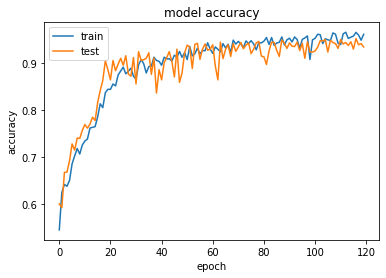

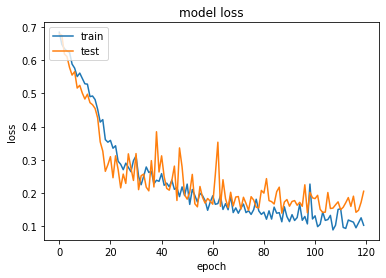

In [11]:
# Plot the training data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# Test the model with new data
score = model.evaluate(test_generator, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 - 48s - loss: 0.1657 - accuracy: 0.9315
Test loss: 0.16574935615062714
Test accuracy: 0.9315000176429749


In [13]:
# Save the model
model.save('cats_vs_dogs.h5')